In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
path = '/content/drive/MyDrive/transactions.csv'
file = open(path)
type(file)
csvreader = csv.reader(file)

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/transactions.csv'
df = pd.read_csv(path, encoding = 'unicode escape')
df.describe

<bound method NDFrame.describe of              date  store_nbr  transactions
0      2013-01-01         25           770
1      2013-01-02          1          2111
2      2013-01-02          2          2358
3      2013-01-02          3          3487
4      2013-01-02          4          1922
...           ...        ...           ...
83483  2017-08-15         50          2804
83484  2017-08-15         51          1573
83485  2017-08-15         52          2255
83486  2017-08-15         53           932
83487  2017-08-15         54           802

[83488 rows x 3 columns]>

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import prophet

In [ ]:
df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
df.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [ ]:
df ['date'] = pd.to_datetime(df ['date'])
df.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

In [ ]:
df.drop('store_nbr', axis = 1, inplace = True)

In [ ]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2013-01-01,770
1,2013-01-02,2111
2,2013-01-02,2358
3,2013-01-02,3487
4,2013-01-02,1922


In [ ]:
from prophet.forecaster import Prophet
p = Prophet(interval_width = 0.92, daily_seasonality = True)

In [ ]:
model = p.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvgzvnfu1/ogo3yhke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvgzvnfu1/gkf6z54v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85243', 'data', 'file=/tmp/tmpvgzvnfu1/ogo3yhke.json', 'init=/tmp/tmpvgzvnfu1/gkf6z54v.json', 'output', 'file=/tmp/tmpvgzvnfu1/prophet_model4q76gluu/prophet_model-20221104103149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:31:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = p.make_future_dataframe(periods = 200, freq = 'D')
future.tail()

,ds
1877,2018-02-27
1878,2018-02-28
1879,2018-03-01
1880,2018-03-02
1881,2018-03-03


In [ ]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1877,2018-02-27,995.069344,-91.158037,3242.586054,969.513084,1018.580917,599.524205,599.524205,599.524205,738.116418,...,-95.386601,-95.386601,-95.386601,-43.205611,-43.205611,-43.205611,0.0,0.0,0.0,1594.593550
1878,2018-02-28,995.242761,-65.020885,3254.188803,969.487913,1018.946956,626.417525,626.417525,626.417525,738.116418,...,-72.446802,-72.446802,-72.446802,-39.252092,-39.252092,-39.252092,0.0,0.0,0.0,1621.660285
1879,2018-03-01,995.416177,-194.898622,3177.323734,969.408798,1019.309254,559.741247,559.741247,559.741247,738.116418,...,-143.630022,-143.630022,-143.630022,-34.745148,-34.745148,-34.745148,0.0,0.0,0.0,1555.157424
1880,2018-03-02,995.589593,-42.327458,3249.320633,969.329683,1019.661699,668.781379,668.781379,668.781379,738.116418,...,-39.476632,-39.476632,-39.476632,-29.858407,-29.858407,-29.858407,0.0,0.0,0.0,1664.370973
1881,2018-03-03,995.763010,344.784000,3559.466891,969.250567,1019.953824,969.278056,969.278056,969.278056,738.116418,...,255.934706,255.934706,255.934706,-24.773068,-24.773068,-24.773068,0.0,0.0,0.0,1965.041066


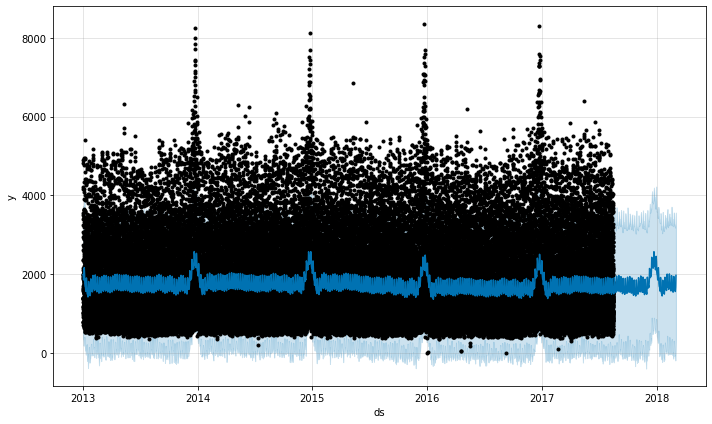

In [ ]:
plot1 = p.plot(forecast_prediction)

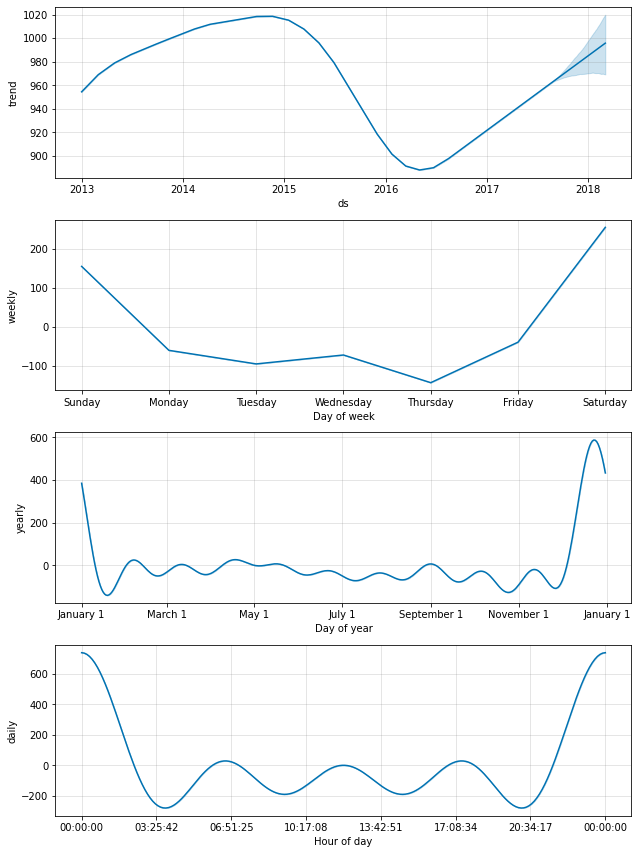

In [ ]:
plot2 = p.plot_components(forecast_prediction)

In [ ]:
import pandas as pd